In [1]:
"""

This example code illustrates how to access and visualize CDPC CloudSAT
Swath HDF-EOS2 file in Python (PyHDF).

If you have any questions, suggestions, or comments on this example, please use
the HDF-EOS Forum (http://hdfeos.org/forums).  If you would like to see an
example of any other NASA HDF/HDF-EOS data product that is not listed in the
HDF-EOS Comprehensive Examples page (http://hdfeos.org/zoo), feel free to
contact us at eoshelp@hdfgroup.org or post it at the HDF-EOS Forum
(http://hdfeos.org/forums).

Usage:  save this script and run

    python 2010128055614_21420_CS_2B-GEOPROF_GRANULE_P_R04_E03.hdf.py

The HDF4 file must be in your current working directory 
where the Python script resides.

Last Update: 2015-09-28

"""

import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from pyhdf.SD import SD, SDC
from pyhdf import HDF, VS, V

# Open HDF4 file.
FILE_NAME = r'F:\IITM_RA_LAL_SIR\calipso_data_samples\Matlab_trails\2010128055614_21420_CS_2B-GEOPROF_GRANULE_P_R04_E03.hdf'
hdf = SD(FILE_NAME, SDC.READ)

# print hdf.datasets()

# Read datasets.
DATAFIELD_NAME = 'Radar_Reflectivity';
dset = hdf.select(DATAFIELD_NAME)
data = dset[:,:]

ht = hdf.select('Height')
height = ht[:,:]

# Read attributes.
attrs = dset.attributes(full=1)
lna=attrs["long_name"]
long_name = lna[0]
sfa=attrs["factor"]
scale_factor = sfa[0]        
vra=attrs["valid_range"]
valid_min = vra[0][0]        
valid_max = vra[0][1]        
ua=attrs["units"]
units = ua[0]

attrs_h = ht.attributes(full=1)
uah=attrs_h["units"]
units_h = uah[0]

h = HDF.HDF(FILE_NAME)
vs = h.vstart()

xid = vs.find('Latitude')
latid = vs.attach(xid)
latid.setfields('Latitude')
nrecs, _, _, _, _ = latid.inquire()
latitude = latid.read(nRec=nrecs)
latid.detach()

lonid = vs.attach(vs.find('Longitude'))
lonid.setfields('Longitude')
nrecs, _, _, _, _ = lonid.inquire()
longitude = lonid.read(nRec=nrecs)
lonid.detach()

timeid = vs.attach(vs.find('Profile_time'))
timeid.setfields('Profile_time')
nrecs, _, _, _, _ = timeid.inquire()
time = timeid.read(nRec=nrecs)
units_t =  timeid.attr('units').get()
longname_t = timeid.attr('long_name').get()
timeid.detach()

# Process valid range.
invalid = np.logical_or(data < valid_min, data > valid_max)
dataf = data.astype(float)
dataf[invalid] = np.nan

# Apply scale factor according to [1].
dataf = dataf / scale_factor

# Make a split window plot.
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(2, 1, 1)
    
# Contour the data.
t, h = np.meshgrid(time, height[0,:])
im = ax1.contourf(t, h, dataf.T)
ax1.set_xlabel(longname_t+' ('+units_t+')')
ax1.set_ylabel('Height ('+units_h+')')
basename = os.path.basename(FILE_NAME)
ax1.set_title('{0}\n{1}'.format(basename,  long_name))
cb = plt.colorbar(im)
cb.set_label(units)

# The 2nd plot is the trajectory.
ax2 = plt.subplot(2, 1, 2)
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat = 90,
            llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])
# x, y = m(longitude, latitude)
m.plot(longitude, latitude, linestyle='None', marker='.',
      color='blue', latlon=True)

# Annotate the starting point.
m.plot(longitude[0], latitude[0], marker='o', color='red')

plt.title('Trajectory of Flight Path (starting point in red)')

fig = plt.gcf()
pngfile = "{0}.py.png".format(basename)
fig.savefig(pngfile)

#  References
#
# [1] http://www.cloudsat.cira.colostate.edu/dataSpecs.php

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

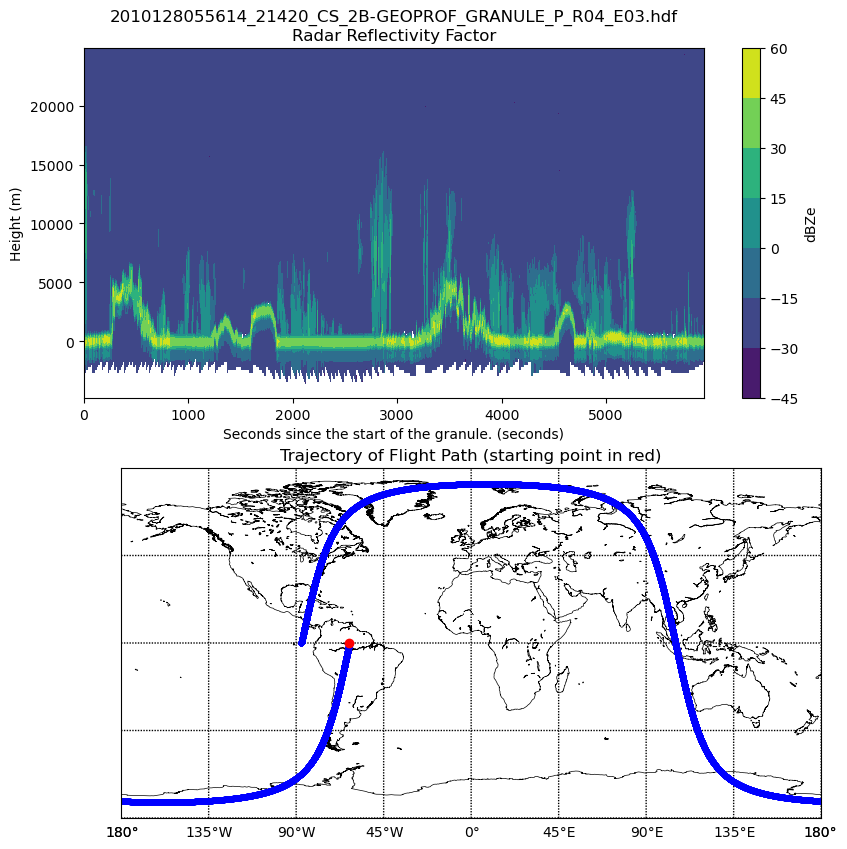

In [5]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from pyhdf.SD import SD, SDC
from pyhdf import HDF, VS, V

# Open HDF4 file.
FILE_NAME = r'F:\IITM_RA_LAL_SIR\calipso_data_samples\Matlab_trails\2010128055614_21420_CS_2B-GEOPROF_GRANULE_P_R04_E03.hdf'
hdf = SD(FILE_NAME, SDC.READ)

# print hdf.datasets()

# Read datasets.
DATAFIELD_NAME = 'Radar_Reflectivity';
dset = hdf.select(DATAFIELD_NAME)
data = dset[:,:]

ht = hdf.select('Height')
height = ht[:,:]

# Read attributes.
attrs = dset.attributes(full=1)
lna=attrs["long_name"]
long_name = lna[0]
sfa=attrs["factor"]
scale_factor = sfa[0]        
vra=attrs["valid_range"]
valid_min = vra[0][0]        
valid_max = vra[0][1]        
ua=attrs["units"]
units = ua[0]

attrs_h = ht.attributes(full=1)
uah=attrs_h["units"]
units_h = uah[0]

h = HDF.HDF(FILE_NAME)
vs = h.vstart()

xid = vs.find('Latitude')
latid = vs.attach(xid)
latid.setfields('Latitude')
nrecs, _, _, _, _ = latid.inquire()
latitude = latid.read(nRec=nrecs)
latid.detach()

lonid = vs.attach(vs.find('Longitude'))
lonid.setfields('Longitude')
nrecs, _, _, _, _ = lonid.inquire()
longitude = lonid.read(nRec=nrecs)
lonid.detach()

timeid = vs.attach(vs.find('Profile_time'))
timeid.setfields('Profile_time')
nrecs, _, _, _, _ = timeid.inquire()
time = timeid.read(nRec=nrecs)
units_t =  timeid.attr('units').get()
longname_t = timeid.attr('long_name').get()
timeid.detach()

# Process valid range.
invalid = np.logical_or(data < valid_min, data > valid_max)
dataf = data.astype(float)
dataf[invalid] = np.nan

# Apply scale factor according to [1].
dataf = dataf / scale_factor

# Make a split window plot.
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(2, 1, 1)
    
# Contour the data.
t, h = np.meshgrid(time, height[0,:])
im = ax1.contourf(t, h, dataf.T)
ax1.set_xlabel(longname_t+' ('+units_t+')')
ax1.set_ylabel('Height ('+units_h+')')
basename = os.path.basename(FILE_NAME)
ax1.set_title('{0}\n{1}'.format(basename,  long_name))
cb = plt.colorbar(im)
cb.set_label(units)

# The 2nd plot is the trajectory.
ax2 = plt.subplot(2, 1, 2)
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat = 90,
            llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])
# x, y = m(longitude, latitude)
m.plot(longitude, latitude, linestyle='None', marker='.',
      color='blue', latlon=True)

# Annotate the starting point.
m.plot(longitude[0], latitude[0], marker='o', color='red')

plt.title('Trajectory of Flight Path (starting point in red)')

fig = plt.gcf()
pngfile = "{0}.py.png".format(basename)
fig.savefig(pngfile)

In [2]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from pyhdf.SD import SD, SDC
from pyhdf import HDF, VS, V

# Open HDF4 file.
FILE_NAME = r'F:\IITM_RA_LAL_SIR\calipso_data_samples\Matlab_trails\2010128055614_21420_CS_2B-GEOPROF_GRANULE_P_R04_E03.hdf'
hdf = SD(FILE_NAME, SDC.READ)

# print hdf.datasets()

# Read datasets.
DATAFIELD_NAME = 'Radar_Reflectivity';
dset = hdf.select(DATAFIELD_NAME)
data = dset[:,:]

ht = hdf.select('Height')
height = ht[:,:]

# Read attributes.
attrs = dset.attributes(full=1)
lna=attrs["long_name"]
long_name = lna[0]
sfa=attrs["factor"]
scale_factor = sfa[0]        
vra=attrs["valid_range"]
valid_min = vra[0][0]        
valid_max = vra[0][1]        
ua=attrs["units"]
units = ua[0]

attrs_h = ht.attributes(full=1)
uah=attrs_h["units"]
units_h = uah[0]

h = HDF.HDF(FILE_NAME)
vs = h.vstart()

xid = vs.find('Latitude')
latid = vs.attach(xid)
latid.setfields('Latitude')
nrecs, _, _, _, _ = latid.inquire()
latitude = latid.read(nRec=nrecs)
latid.detach()

lonid = vs.attach(vs.find('Longitude'))
lonid.setfields('Longitude')
nrecs, _, _, _, _ = lonid.inquire()
longitude = lonid.read(nRec=nrecs)
lonid.detach()

timeid = vs.attach(vs.find('Profile_time'))
timeid.setfields('Profile_time')
nrecs, _, _, _, _ = timeid.inquire()
time = timeid.read(nRec=nrecs)
units_t =  timeid.attr('units').get()
longname_t = timeid.attr('long_name').get()
timeid.detach()

# Process valid range.
invalid = np.logical_or(data < valid_min, data > valid_max)
dataf = data.astype(float)
dataf[invalid] = np.nan

# Apply scale factor according to [1].
dataf = dataf / scale_factor

# Make a split window plot.
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(2, 1, 1)
    
# Contour the data.
t, h = np.meshgrid(time, height[0,:])
im = ax1.contourf(t, h, dataf.T)
ax1.set_xlabel(longname_t+' ('+units_t+')')
ax1.set_ylabel('Height ('+units_h+')')
basename = os.path.basename(FILE_NAME)
ax1.set_title('{0}\n{1}'.format(basename,  long_name))
cb = plt.colorbar(im)
cb.set_label(units)

# The 2nd plot is the trajectory.
ax2 = plt.subplot(2, 1, 2)
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat = 90,
            llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])
# x, y = m(longitude, latitude)
m.plot(longitude, latitude, linestyle='None', marker='.',
      color='blue', latlon=True)

# Annotate the starting point.
m.plot(longitude[0], latitude[0], marker='o', color='red')

plt.title('Trajectory of Flight Path (starting point in red)')

fig = plt.gcf()
pngfile = "{0}.py.png".format(basename)
fig.savefig(pngfile)

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

NameError: name 'Basemap' is not defined

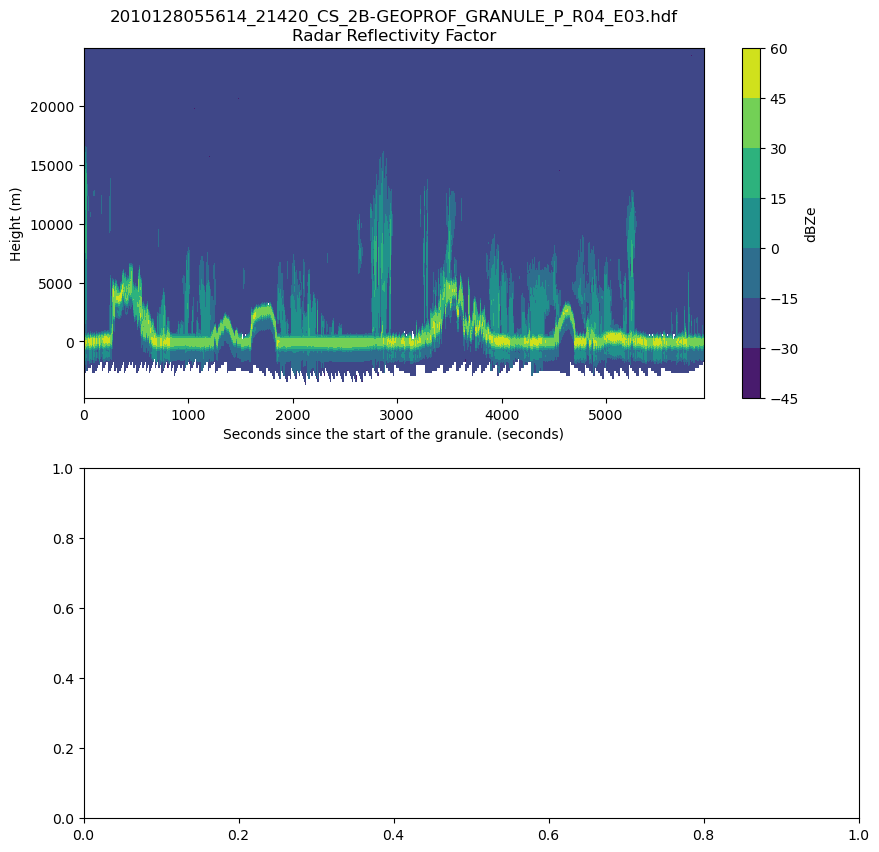

In [3]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import numpy as np
from pyhdf.SD import SD, SDC
from pyhdf import HDF, VS, V

# Open HDF4 file.
FILE_NAME = r'F:\IITM_RA_LAL_SIR\calipso_data_samples\Matlab_trails\2010128055614_21420_CS_2B-GEOPROF_GRANULE_P_R04_E03.hdf'
hdf = SD(FILE_NAME, SDC.READ)

# print hdf.datasets()

# Read datasets.
DATAFIELD_NAME = 'Radar_Reflectivity';
dset = hdf.select(DATAFIELD_NAME)
data = dset[:,:]

ht = hdf.select('Height')
height = ht[:,:]

# Read attributes.
attrs = dset.attributes(full=1)
lna=attrs["long_name"]
long_name = lna[0]
sfa=attrs["factor"]
scale_factor = sfa[0]        
vra=attrs["valid_range"]
valid_min = vra[0][0]        
valid_max = vra[0][1]        
ua=attrs["units"]
units = ua[0]

attrs_h = ht.attributes(full=1)
uah=attrs_h["units"]
units_h = uah[0]

h = HDF.HDF(FILE_NAME)
vs = h.vstart()

xid = vs.find('Latitude')
latid = vs.attach(xid)
latid.setfields('Latitude')
nrecs, _, _, _, _ = latid.inquire()
latitude = latid.read(nRec=nrecs)
latid.detach()

lonid = vs.attach(vs.find('Longitude'))
lonid.setfields('Longitude')
nrecs, _, _, _, _ = lonid.inquire()
longitude = lonid.read(nRec=nrecs)
lonid.detach()

timeid = vs.attach(vs.find('Profile_time'))
timeid.setfields('Profile_time')
nrecs, _, _, _, _ = timeid.inquire()
time = timeid.read(nRec=nrecs)
units_t =  timeid.attr('units').get()
longname_t = timeid.attr('long_name').get()
timeid.detach()

# Process valid range.
invalid = np.logical_or(data < valid_min, data > valid_max)
dataf = data.astype(float)
dataf[invalid] = np.nan

# Apply scale factor according to [1].
dataf = dataf / scale_factor

# Make a split window plot.
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(2, 1, 1)
    
# Contour the data.
t, h = np.meshgrid(time, height[0,:])
im = ax1.contourf(t, h, dataf.T)
ax1.set_xlabel(longname_t+' ('+units_t+')')
ax1.set_ylabel('Height ('+units_h+')')
basename = os.path.basename(FILE_NAME)
ax1.set_title('{0}\n{1}'.format(basename,  long_name))
cb = plt.colorbar(im)
cb.set_label(units)

# The 2nd plot is the trajectory.
ax2 = plt.subplot(2, 1, 2)
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat = 90,
            llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])
# x, y = m(longitude, latitude)
m.plot(longitude, latitude, linestyle='None', marker='.',
      color='blue', latlon=True)

# Annotate the starting point.
m.plot(longitude[0], latitude[0], marker='o', color='red')

plt.title('Trajectory of Flight Path (starting point in red)')

fig = plt.gcf()
pngfile = "{0}.py.png".format(basename)
fig.savefig(pngfile)

In [4]:
pip install basemap

Note: you may need to restart the kernel to use updated packages.Collecting basemap
     ------------------------------------ 487.9/487.9 kB 449.4 kB/s eta 0:00:00
     -------------------------------------- 30.5/30.5 MB 297.0 kB/s eta 0:00:00



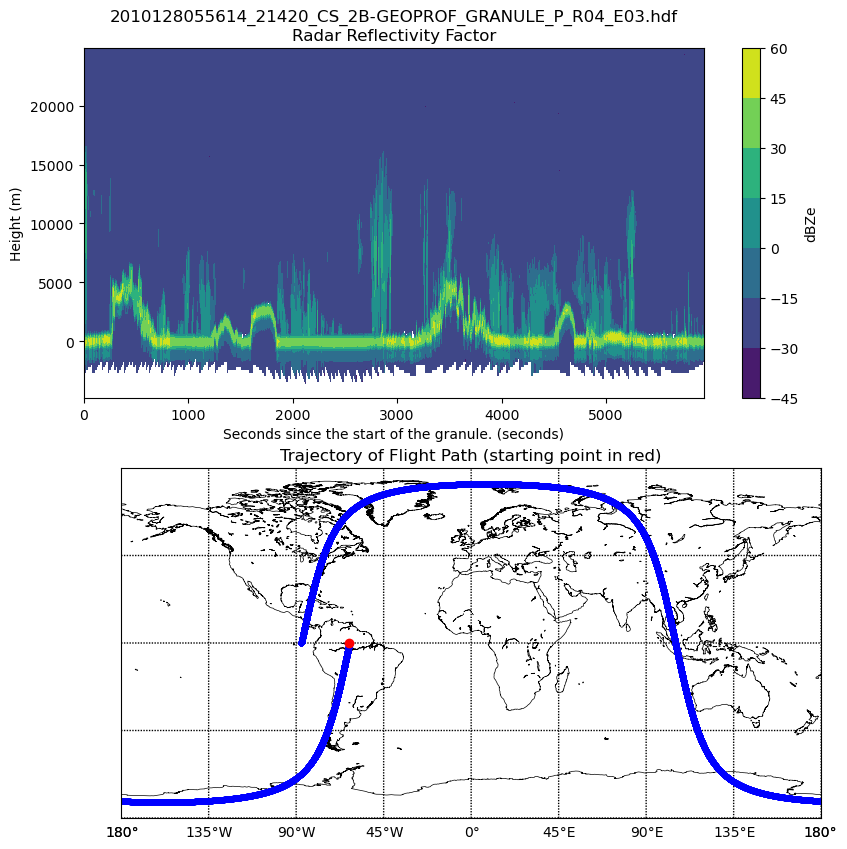

In [6]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from pyhdf.SD import SD, SDC
from pyhdf import HDF, VS, V

# Open HDF4 file.
FILE_NAME = r'F:\IITM_RA_LAL_SIR\calipso_data_samples\Matlab_trails\2010128055614_21420_CS_2B-GEOPROF_GRANULE_P_R04_E03.hdf'
hdf = SD(FILE_NAME, SDC.READ)

# print hdf.datasets()

# Read datasets.
DATAFIELD_NAME = 'Radar_Reflectivity';
dset = hdf.select(DATAFIELD_NAME)
data = dset[:,:]

ht = hdf.select('Height')
height = ht[:,:]

# Read attributes.
attrs = dset.attributes(full=1)
lna=attrs["long_name"]
long_name = lna[0]
sfa=attrs["factor"]
scale_factor = sfa[0]        
vra=attrs["valid_range"]
valid_min = vra[0][0]        
valid_max = vra[0][1]        
ua=attrs["units"]
units = ua[0]

attrs_h = ht.attributes(full=1)
uah=attrs_h["units"]
units_h = uah[0]

h = HDF.HDF(FILE_NAME)
vs = h.vstart()

xid = vs.find('Latitude')
latid = vs.attach(xid)
latid.setfields('Latitude')
nrecs, _, _, _, _ = latid.inquire()
latitude = latid.read(nRec=nrecs)
latid.detach()

lonid = vs.attach(vs.find('Longitude'))
lonid.setfields('Longitude')
nrecs, _, _, _, _ = lonid.inquire()
longitude = lonid.read(nRec=nrecs)
lonid.detach()

timeid = vs.attach(vs.find('Profile_time'))
timeid.setfields('Profile_time')
nrecs, _, _, _, _ = timeid.inquire()
time = timeid.read(nRec=nrecs)
units_t =  timeid.attr('units').get()
longname_t = timeid.attr('long_name').get()
timeid.detach()

# Process valid range.
invalid = np.logical_or(data < valid_min, data > valid_max)
dataf = data.astype(float)
dataf[invalid] = np.nan

# Apply scale factor according to [1].
dataf = dataf / scale_factor

# Make a split window plot.
fig = plt.figure(figsize = (10, 10))
ax1 = plt.subplot(2, 1, 1)
    
# Contour the data.
t, h = np.meshgrid(time, height[0,:])
im = ax1.contourf(t, h, dataf.T)
ax1.set_xlabel(longname_t+' ('+units_t+')')
ax1.set_ylabel('Height ('+units_h+')')
basename = os.path.basename(FILE_NAME)
ax1.set_title('{0}\n{1}'.format(basename,  long_name))
cb = plt.colorbar(im)
cb.set_label(units)

# The 2nd plot is the trajectory.
ax2 = plt.subplot(2, 1, 2)
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat = 90,
            llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])
# x, y = m(longitude, latitude)
m.plot(longitude, latitude, linestyle='None', marker='.',
      color='blue', latlon=True)

# Annotate the starting point.
m.plot(longitude[0], latitude[0], marker='o', color='red')

plt.title('Trajectory of Flight Path (starting point in red)')

fig = plt.gcf()
pngfile = "{0}.py.png".format(basename)
fig.savefig(pngfile)

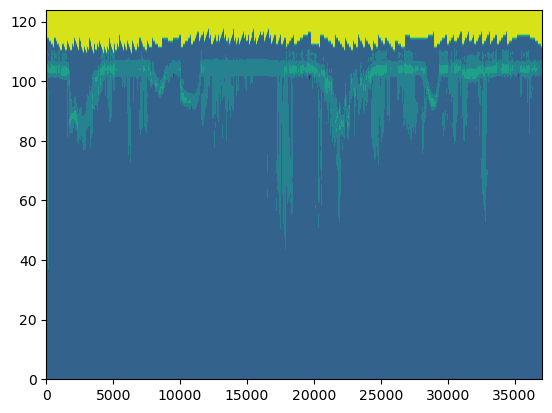

In [15]:
plt.contourf(np.transpose(data))

In [12]:
vra[0][0]

-4000